In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df = pd.read_csv('accidentUTC.csv')
dfdrug = pd.read_csv('drugsUTC.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39508 entries, 0 to 39507
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         39508 non-null  int64  
 1   STATENAME     39508 non-null  object 
 2   ST_CASE       39508 non-null  int64  
 3   PEDS          39508 non-null  int64  
 4   PERNOTMVIT    39508 non-null  int64  
 5   VE_TOTAL      39508 non-null  int64  
 6   VE_FORMS      39508 non-null  int64  
 7   PVH_INVL      39508 non-null  int64  
 8   PERSONS       39508 non-null  int64  
 9   PERMVIT       39508 non-null  int64  
 10  COUNTY        39508 non-null  int64  
 11  COUNTYNAME    39508 non-null  object 
 12  CITY          39508 non-null  int64  
 13  CITYNAME      39508 non-null  object 
 14  MONTH         39508 non-null  int64  
 15  MONTHNAME     39508 non-null  object 
 16  DAY           39508 non-null  int64  
 17  DAYNAME       39508 non-null  int64  
 18  DAY_WEEK      39508 non-nu

In [8]:
dfdrug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116162 entries, 0 to 116161
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   STATE         116162 non-null  int64 
 1   STATENAME     116162 non-null  object
 2   ST_CASE       116162 non-null  int64 
 3   VEH_NO        116162 non-null  int64 
 4   PER_NO        116162 non-null  int64 
 5   DRUGSPEC      116162 non-null  int64 
 6   DRUGSPECNAME  116162 non-null  object
 7   DRUGRES       116162 non-null  int64 
 8   DRUGRESNAME   116162 non-null  object
dtypes: int64(6), object(3)
memory usage: 8.0+ MB


In [9]:
top_five_states = df['STATENAME'].value_counts().nlargest(5).index

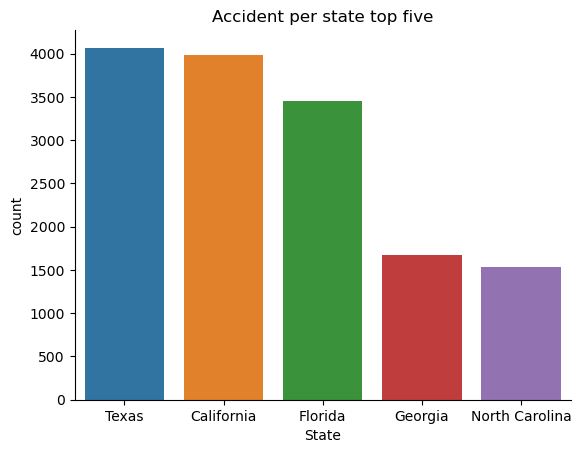

In [10]:
sns.countplot(data=df, x='STATENAME', order=top_five_states)
plt.xlabel('State')
plt.ylabel('count')
plt.title('Accident per state top five')
sns.despine()
plt.show()

In [11]:
DAY_IN_ORDER = df['DAY_WEEKNAME'].value_counts().nlargest(7).index

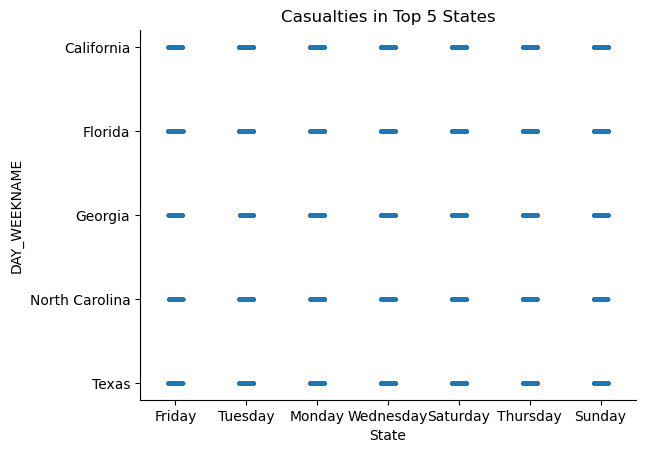

In [12]:
df_top_five_states = df[df['STATENAME'].isin(top_five_states)]

sns.stripplot(data=df_top_five_states, x='DAY_WEEKNAME', y='STATENAME', size=3, jitter=True)
plt.xlabel('State')
plt.ylabel('DAY_WEEKNAME')
plt.title('Casualties in Top 5 States')
sns.despine()
plt.show()

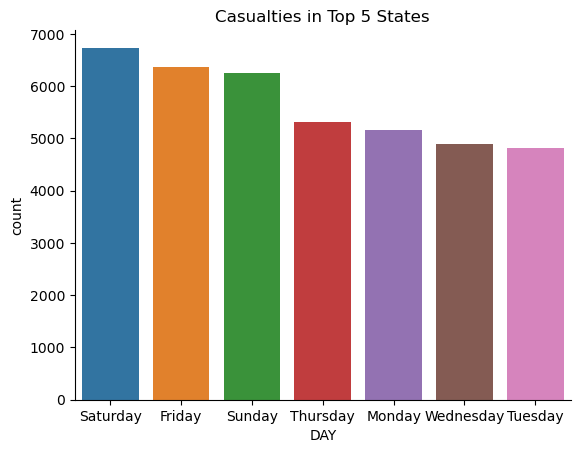

In [13]:
sns.countplot(data=df, x='DAY_WEEKNAME', order= DAY_IN_ORDER)
plt.xlabel('DAY')
plt.ylabel('count')
plt.title('Casualties in Top 5 States')
sns.despine()
plt.show()

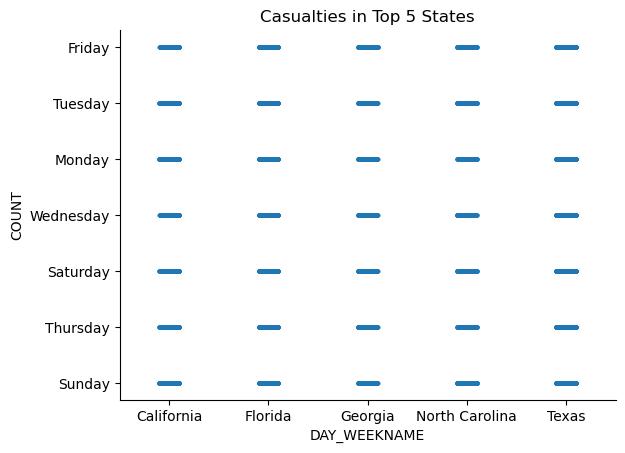

In [14]:
sns.stripplot(data=df_top_five_states, x='STATENAME', y='DAY_WEEKNAME', size=3)
plt.xlabel('DAY_WEEKNAME')
plt.ylabel('COUNT')
plt.title('Casualties in Top 5 States')
sns.despine()
plt.show()

In [15]:
df['DAY_WEEK'] = pd.to_datetime(df['DAY_WEEK'])

In [16]:
top_five_states = df['STATENAME'].value_counts().nlargest(5).index
df_top_five_states = df[df['STATENAME'].isin(top_five_states)]

In [17]:
accidents_by_day = df_top_five_states.groupby(['STATENAME', df_top_five_states['DAY_WEEK'].dt.dayofweek])['DAY_WEEK'].count().reset_index(name='Accident Count')

In [18]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_day['DAY_WEEK'] = pd.Categorical(accidents_by_day['DAY_WEEK'], categories=days_of_week, ordered=True)

In [19]:
accidents_by_day = accidents_by_day.sort_values(by=['STATENAME', 'DAY_WEEK'])

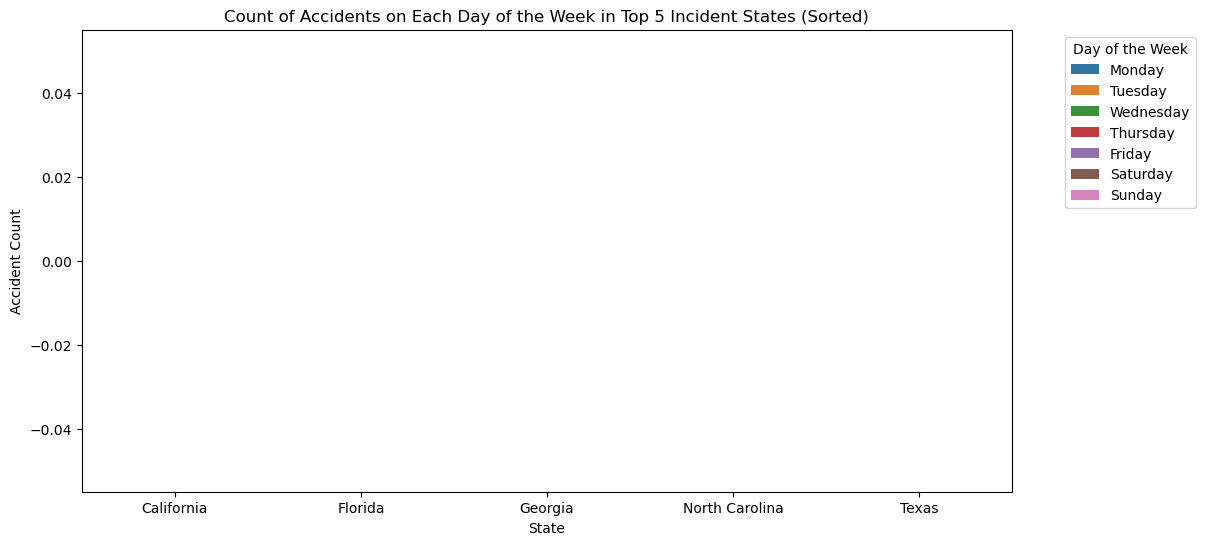

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_day, x='STATENAME', y='Accident Count', hue='DAY_WEEK')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.title('Count of Accidents on Each Day of the Week in Top 5 Incident States (Sorted)')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

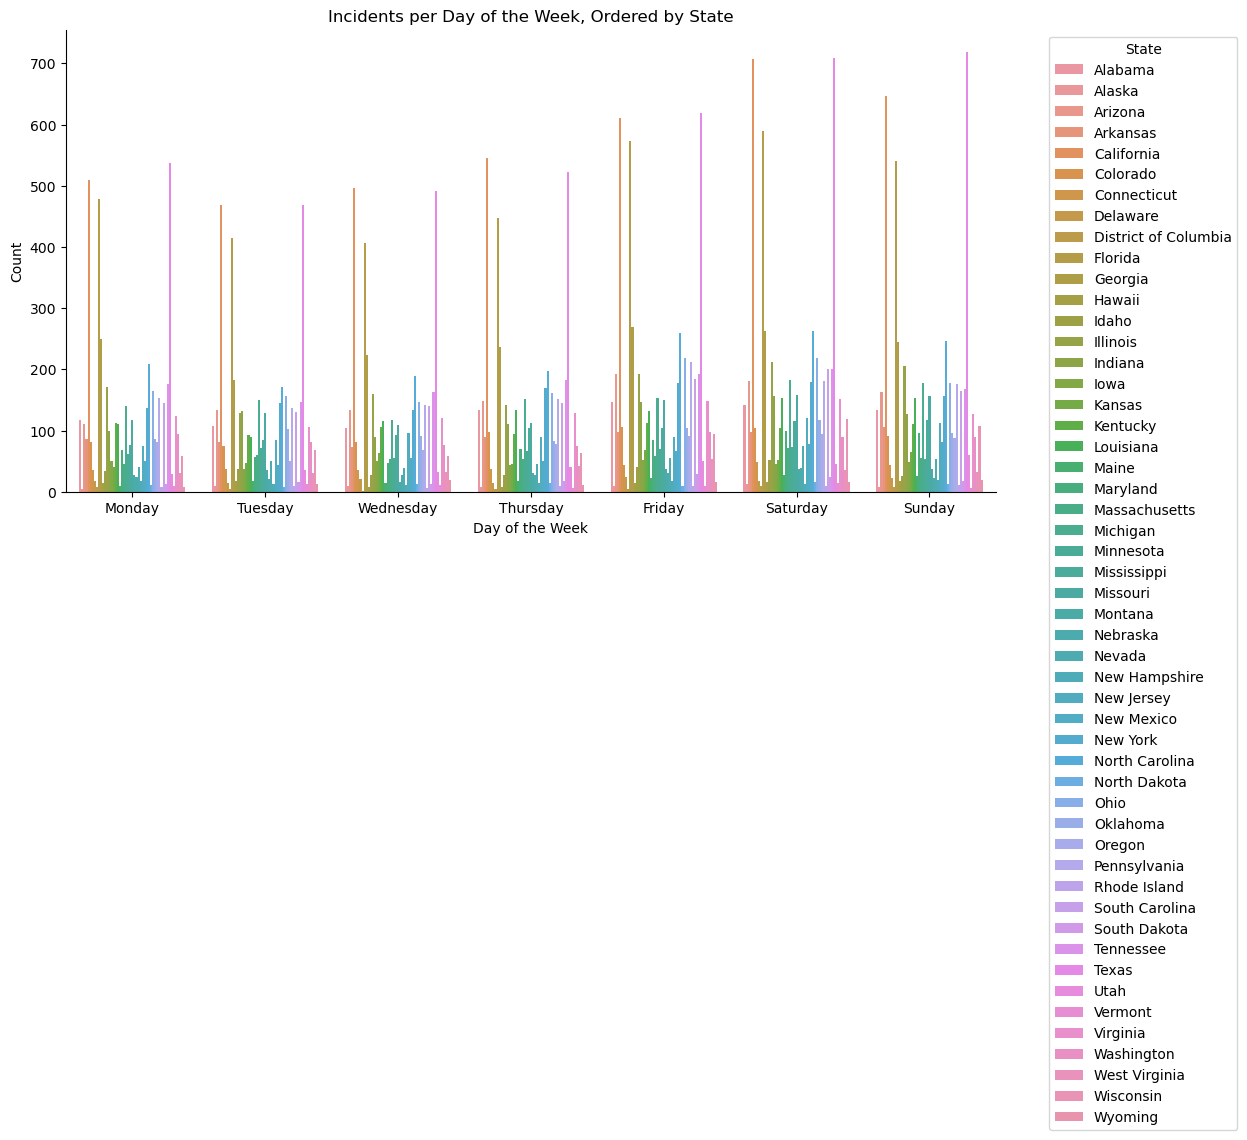

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [22]:
df_texas = df[df['STATENAME'] == 'Texas']

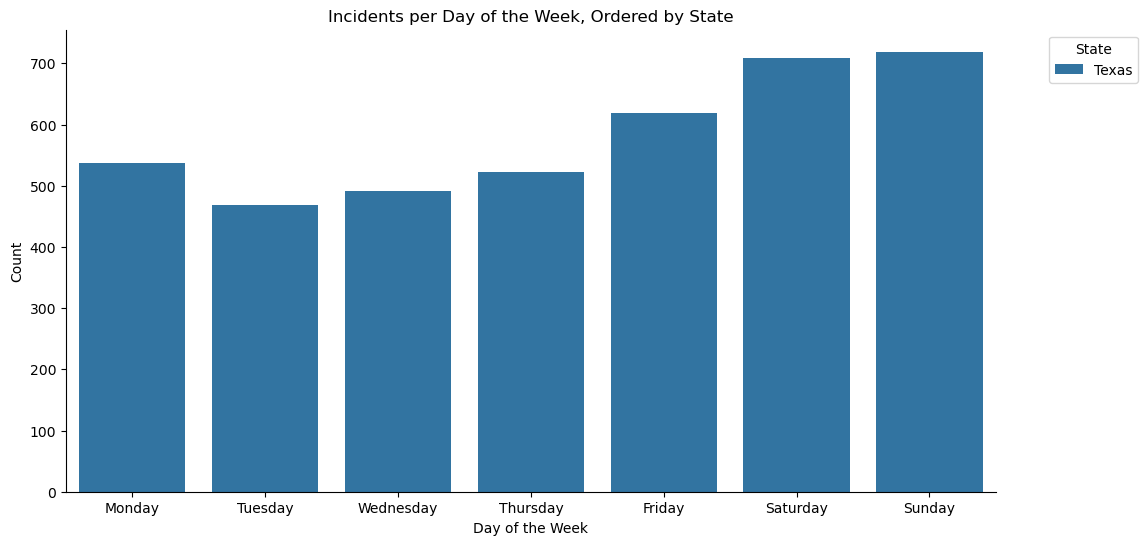

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_texas, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [24]:
df_Florida = df[df['STATENAME'] == 'Florida']
df_Georgia = df[df['STATENAME'] == 'Georgia']
df_California = df[df['STATENAME'] == 'California']
df_North_Carolina = df[df['STATENAME'] == 'North Carolina']

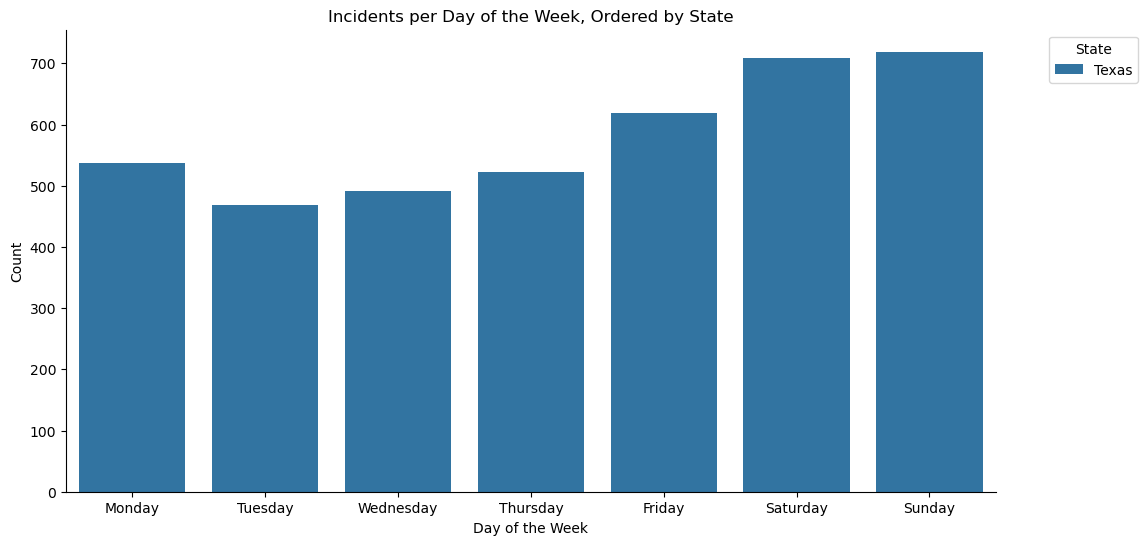

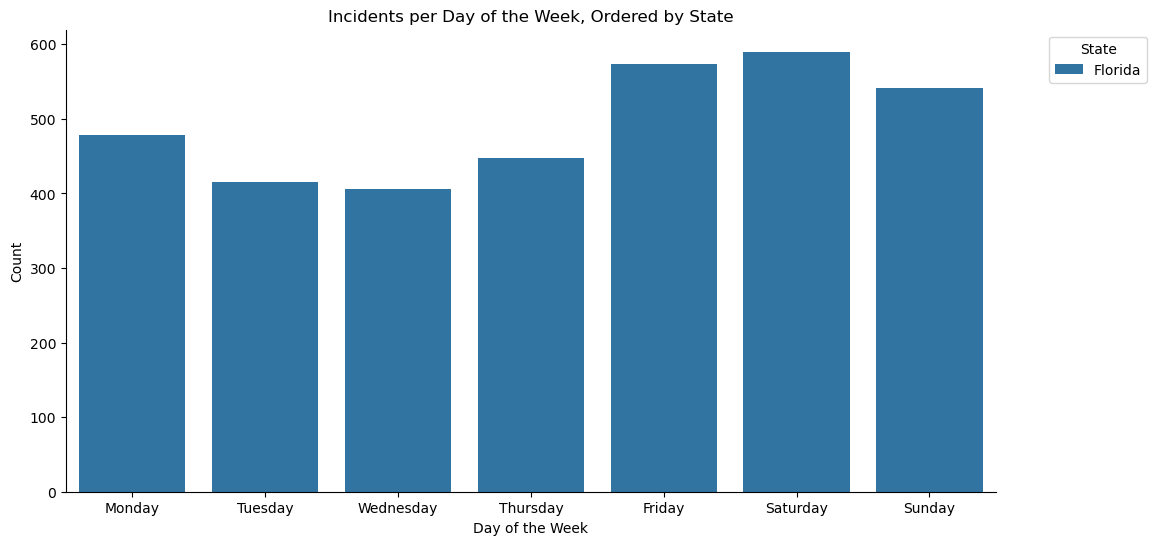

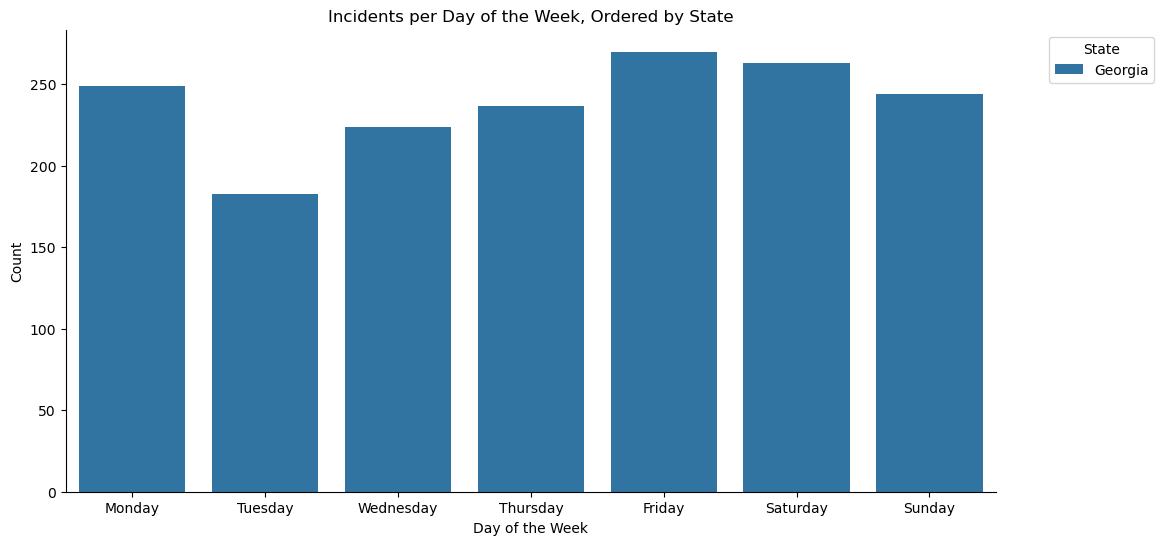

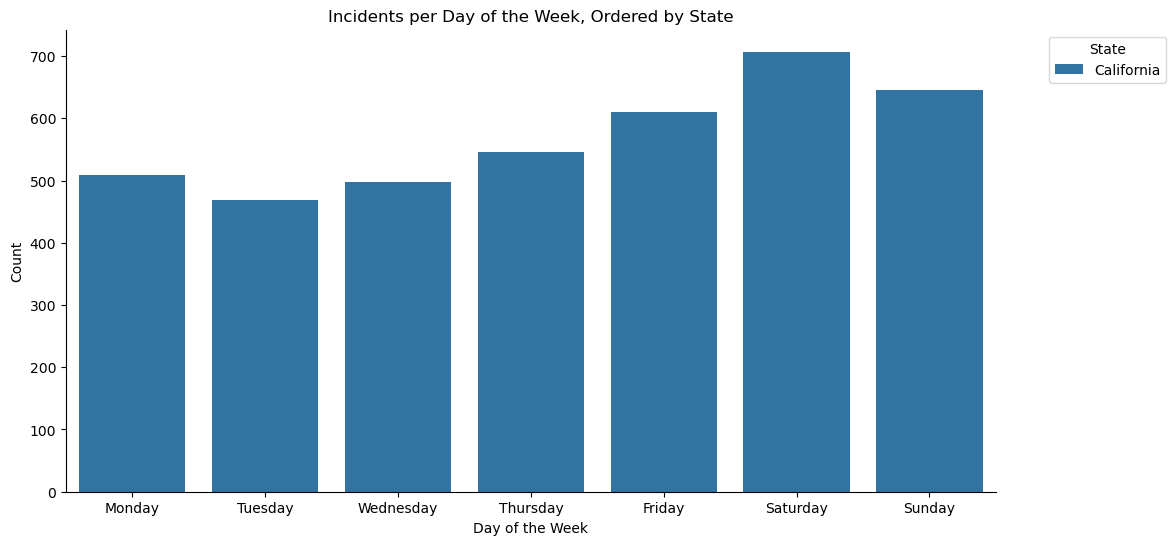

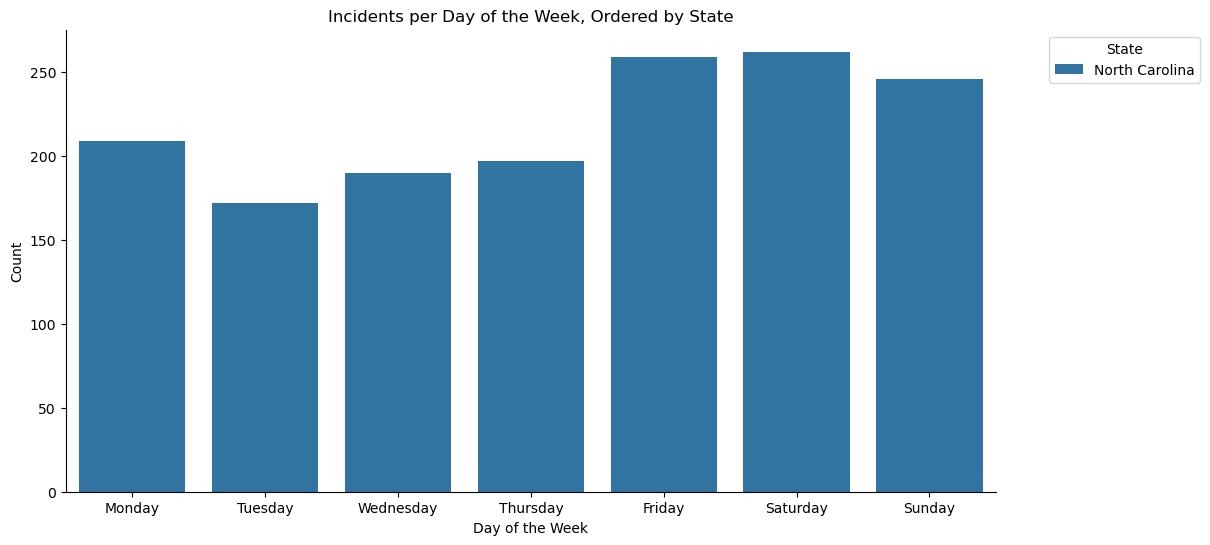

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_texas, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_Florida, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_Georgia, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_California, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_North_Carolina, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39508 entries, 0 to 39507
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATE         39508 non-null  int64         
 1   STATENAME     39508 non-null  object        
 2   ST_CASE       39508 non-null  int64         
 3   PEDS          39508 non-null  int64         
 4   PERNOTMVIT    39508 non-null  int64         
 5   VE_TOTAL      39508 non-null  int64         
 6   VE_FORMS      39508 non-null  int64         
 7   PVH_INVL      39508 non-null  int64         
 8   PERSONS       39508 non-null  int64         
 9   PERMVIT       39508 non-null  int64         
 10  COUNTY        39508 non-null  int64         
 11  COUNTYNAME    39508 non-null  object        
 12  CITY          39508 non-null  int64         
 13  CITYNAME      39508 non-null  object        
 14  MONTH         39508 non-null  int64         
 15  MONTHNAME     39508 non-null  object

In [29]:
from scipy.stats import chi2_contingency

In [39]:
contingency_table = pd.crosstab(df['STATENAME'], df['DAY_WEEKNAME'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("There is a significant association between STATENAME and DAY_WEEKNAME.")
else:
    print("There is no significant association between STATENAME and DAY_WEEKNAME.")

Chi-square value: 330.4551674930185
P-value: 0.10924000622850218
There is no significant association between STATENAME and DAY_WEEKNAME.


In [40]:
fatal_accidents = df[df['FATALS'] == 1]
fatal_counts = fatal_accidents['STATENAME'].value_counts().reset_index()
fatal_counts.columns = ['STATENAME', 'FatalCount']
total_counts = df['STATENAME'].value_counts().reset_index()
total_counts.columns = ['STATENAME', 'TotalCount']
merged_counts = pd.merge(fatal_counts, total_counts, on='STATENAME')
merged_counts['Probability'] = merged_counts['FatalCount'] / merged_counts['TotalCount']
days_in_year = 365  # or the actual number of days in your dataset
merged_counts['ProbabilityNormalized'] = merged_counts['Probability'] / days_in_year
sorted_counts = merged_counts.sort_values(by='ProbabilityNormalized', ascending=False)
print(sorted_counts[['STATENAME', 'ProbabilityNormalized']])

               STATENAME  ProbabilityNormalized
45                Hawaii               0.002740
48          Rhode Island               0.002695
50  District of Columbia               0.002671
40              Delaware               0.002657
19            New Jersey               0.002629
30         Massachusetts               0.002616
9               New York               0.002608
34           Connecticut               0.002604
38               Montana               0.002592
8           Pennsylvania               0.002588
11              Michigan               0.002579
1             California               0.002573
32                Nevada               0.002572
14              Virginia               0.002570
33                  Iowa               0.002565
10        South Carolina               0.002565
3                Georgia               0.002564
22              Colorado               0.002559
27              Maryland               0.002556
17               Indiana               0